### What is Artificial Neural Network?

Artificial Neural Network (ANN) is a machine learning algorithm that processes data in the form of layers which mimics the way human's nerves work hence the name "neural" in Neural Network. \
This idea has many forms that has it's own entire subset of the machine learning field called deep learning. \
To understand ANNs, we need understand how a perceptron.

### How perceptron works?

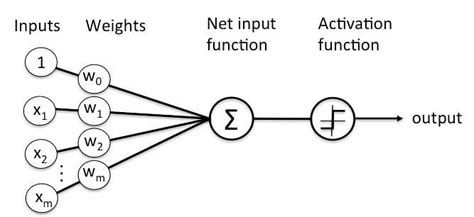
Perceptron has an input layer which has the same number of nodes as the number of features.\
These input get computed into one output (the perceptron) as shown in the image. \
The way it's computed is performing a linear function by some weight for each data feature in the feature vector. \
The net input function, as indicated by the sigma symbol, is the sum of weights multiplied its feature input. \
Notice how the first ($x_0$) is 1. This is the bias which is just an extra weight initialized for better prediction. \
It's not required but recommended.
$$ z = \sum_{i=1}^{m} w_{j}x_{j} + w_{0}$$
One issue with this relying on linear functions only per layer in neural network is that it can be simplified to one layer, so adding more layers wouldn't allow for better performance. \
To combat this problem, an activation function is used to add non linearity so that it will have better \
and more realistic predictions from data and it will also help with backpropagation \
(when taking the derivative, it wouldn't just be a constant where there is no direct relationship with changing weight). \
Moreover, the activation function allows the output to be in a certain range which helps with classification models like using softmax (range is from 0 to 1) for multi classification where the entire probability sum of all outputs would be 1 which can be used to determine which best choice of class. \
In summary, a perceptron function would be computed as the following
$$ a = \sigma\left(\sum_{i=1}^{m} w_{j}x_{j} + w_{0}\right)$$
where $\sigma$ is any activation function.

### Feed Forward Process
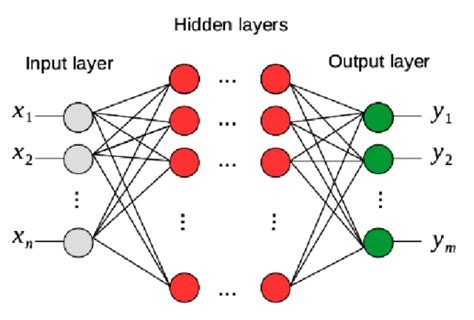

Now that we got the idea of a perceptron, Feed Forward is just applying the perceptron concept to several layers of hidden layers as shown in the image. Computation only happens in hidden layers.
Input layer will get data and output layer will get the last computation from the weights. The output in the output layer will be our prediction. However, neural networks won't get the right weights the first try, so we need to tweak it. Therefore, we're going to use an error function to determine how far are we from getting the right prediction. We will need to find the minimum cost (error) of the function which will be the process of backpropagation.


### Back Propagation
Back propagation is the process of finding the right adjustments needed for each weights such that we minimize the cost function. The cost function will be differentiable so need to differntiate to get the cost change as we change the weight or $\frac{\partial{C}}{\partial{w}}$ \
Another thing to keep in mind is the chain rule.
#### Chain Rule
Imagine we had to find a function that's differentiable $f(g(x)) = \sqrt{x^{2} + 2}$ and $g(x) = x^{2} + 2$. Notice how as we change x, we change g(x) and hence change f(g(x)). \
x --> g(x) --> f(g(x)) \
To find the derivative of f(g(x)), we would have to find the change of f with respect g and also the change of g with respect x. Giving us $\frac{\partial{f}}{\partial{x}} = \frac{\partial{f}}{\partial{g}} * \frac{\partial{g}}{\partial{x}}$. 
For a successful chain rule, we have to make sure we keep track of every function or variable that changes the target output we want. That's the chain rule.
### The Actual Back Propagation 
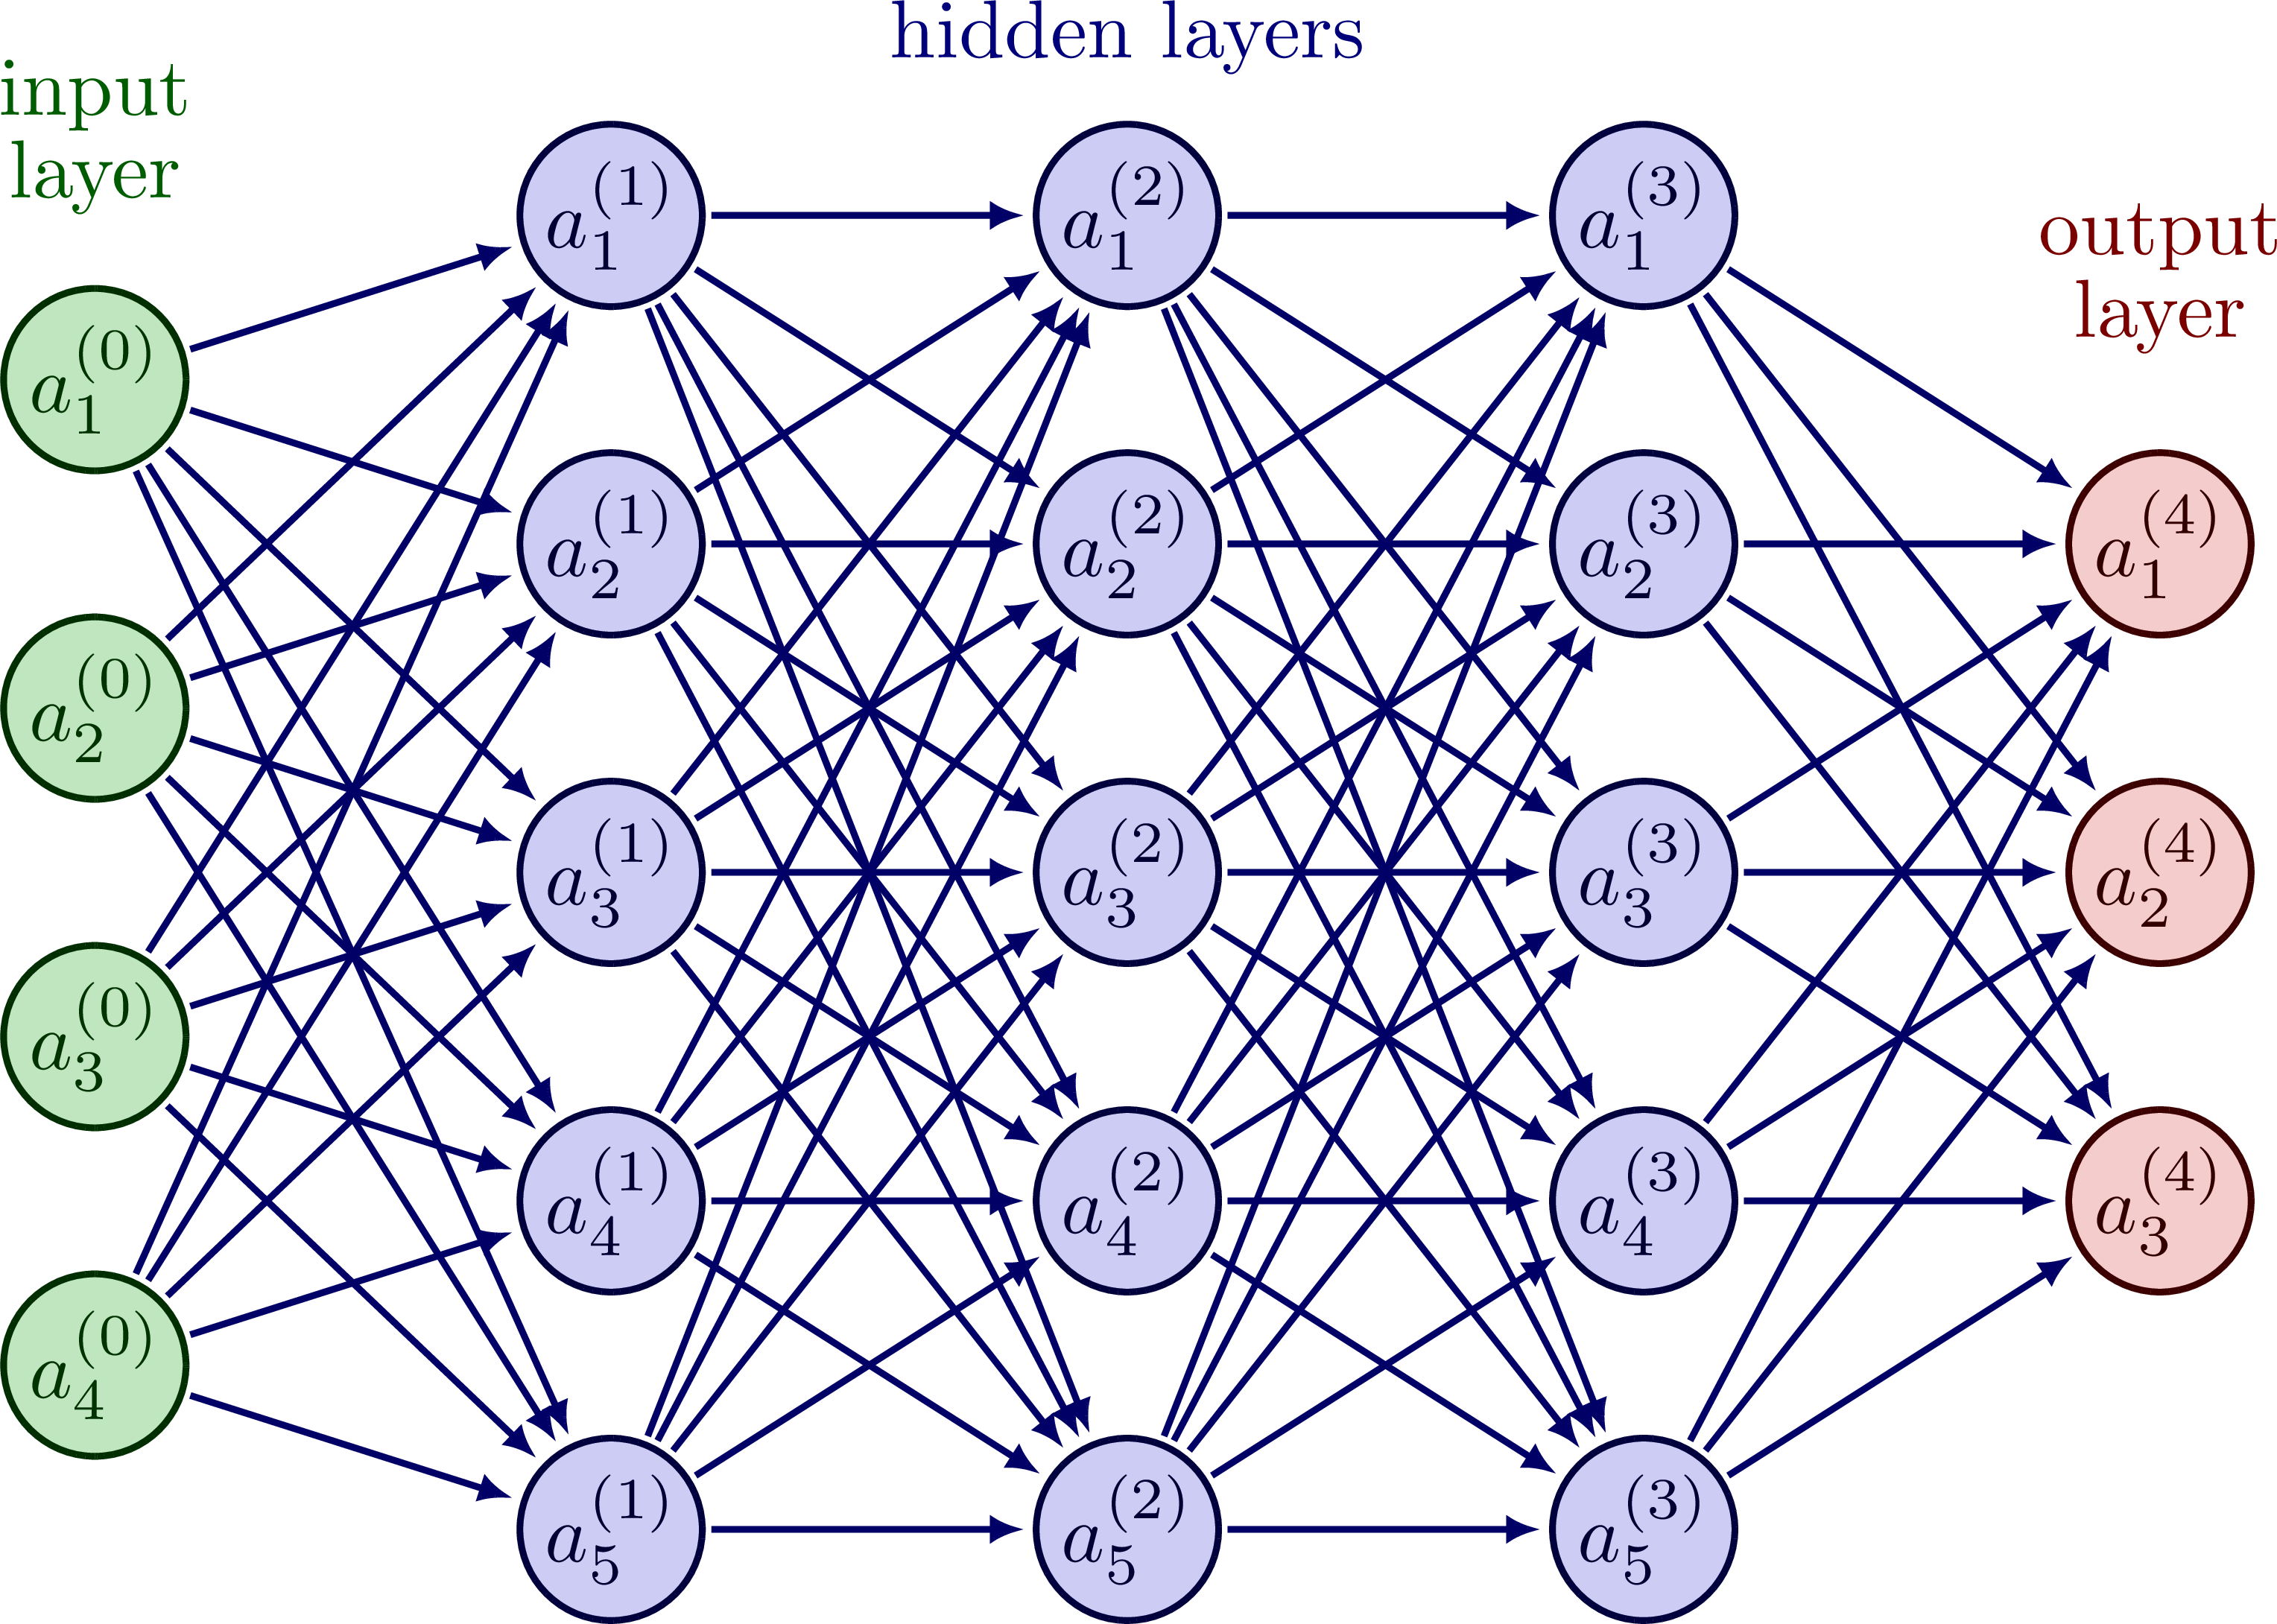
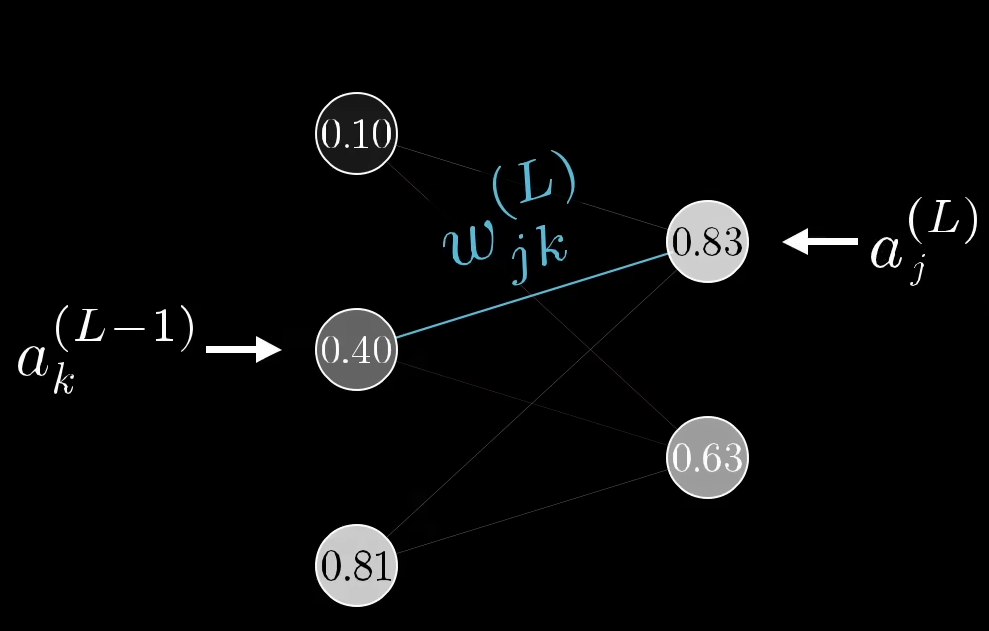 \
To understand back propagation, we need to make sure we understand some notations first to make sense of it. \
Using these pictures as reference, \
We denote $L - 1$ is the previous layer to layer $L$ where the previous layer is indexed by $k$ and the current layer as $j$. \
Let $a_{k}^{(L - 1)}$ be the activation function at layer $L - 1$ at kth position s.t. $a_{k}^{(L - 1)} = \sigma\left({z_{k}^{(L - 1)}}\right)$ \
Let $a_{j}^{(L)}$ be the activation function at layer $L$ at ith position s.t.  $a_{j}^{(L)} = \sigma\left({z_{j}^{(L)}}\right)$ \
Since we're thinking backwards, let's denote $w_{jk}^{(L)}$ as the weight from $a_{j}^{(L)}$ to $a_{k}^{(L - 1)}$. 

Now, let's look into the changes made for each we have \
$w_{jk}^{(L)}$ --> $z_{j}^{(L)}$ --> $a_{j}^{(L)}$ --> $C_{0}$ \
which is the same as
$$\frac{\partial C_{0}}{\partial w_{jk}^{(L)}} = \frac{\partial z_{j}^{(L)}}{\partial w_{jk}^{(L)}} * \frac{\partial a_{j}^{(L)}}{\partial z_{j}^{(L)}} * \frac{\partial C_{0}}{\partial a_{j}^{(L)}}$$
$$\frac{\partial C_{0}}{\partial w_{jk}^{(L)}} = a_{k}^{(L - 1)} * \sigma'\left(z_{j}^{(L)}\right) * \frac{\partial C_{0}}{\partial a_{j}^{(L)}}$$
However, $\frac{\partial C_{0}}{\partial a_{j}^{(L)}}$ might have more layer(s) in other neural networks, so it would be. \
$a_{j}^{(L)}$ --> $z_{m}^{(L+1)}$ --> $a_{m}^{(L+1)}$ --> ... --> $C_{0}$ \
where $m$ is index of layer $(L+ 1)$
$$\frac{\partial C_{0}}{\partial a_{j}^{(L)}} = \sum_{m = 0}^{n_{(L+ 1)} - 1} \frac{\partial z_{m}^{(L + 1)}}{\partial a_{j}^{(L)}} * \frac{\partial a_{m}^{(L + 1)}}{\partial z_{m}^{(L + 1)}} * \frac{\partial C_{0}}{\partial a_{m}^{(L + 1)}}$$ 
$$\frac{\partial C_{0}}{\partial a_{j}^{(L)}} = \sum_{m = 0}^{n_{(L+ 1)} - 1} w_{mj} * \sigma'\left(z_{m}^{(L + 1)} \right) * \frac{\partial C_{0}}{\partial a_{m}^{(L + 1)}}$$ 
The reason why m is iterated through the entire layer is because the each node in $(L + 1)$ is affected by the change of $a_{j}^{(L)}$. \
This definition can be done recursively till we reach $C_{0}$ itself. Do that for every weight, we get $\nabla C$ which is the gradient. \
If we included bias, it would be the same except $a_{k}^{(L - 1)} = 1 \implies \frac{\partial C_{0}}{\partial w_{jk}^{(L)}} = \sigma'\left(z_{j}^{(L)}\right) * \frac{\partial C_{0}}{\partial a_{j}^{(L)}}$

### Optimizers
Once we figured out Back Propagation, now we need to update the weight. There are different ways to update them. These algorithms are called optimizers. \
Gradient descent
$$ w_{t+1} := w_{t} - \eta g_{t}$$
where eta is the learning rate. and $t$ is the step number, $w_{t}$ being current parameters at step t, $w_{t + 1}$ being updated parameters, and $g_{t}$ being the gradients of the cost function with respect to $w_{t}$ for the entire dataset (take the average of all gradients to compute $g_{t}$). 
Stochastic Gradient descent (SGD) is another optimzing algorithm same as Gradient descent \
but it does the optimization after each sample instead of the entire dataset. \

$$ w_{t} := w_{t} - \eta \frac{\partial C_{0}}{w_{t}}$$
where eta is the learning rate. \
However, there might be some noise in some samples that prevent it from reaching the minimum, so there's Mini Batch Gradient Descent which does it for some N samples instead of every sample.\

Another optimizing algorithm is using SGD and Momentum.
$$w_{t + 1} = w_{t} + m_{t}$$
$$m_{t} = \beta m_{t - 1} - \eta g_{t}$$
where beta is the momentum or the decay rate. \
This equation increases the speed of the adjustment which is the point of momentum, so that any weird sample example does not heavily affect the trajectory of the weight adjustments that much. \
To understand how it works, let's compute it for an example. 
$$\text{Initialize} \rightarrow m_{0} = 0$$
$$\text{Step 1} \rightarrow m_{1} = - \eta g_{1}$$
$$\text{Step 2} \rightarrow m_{2} = \beta m_{1} - \eta g_{2} = -\eta\left(\beta g_{1} + g_{2} \right) $$
$$\text{Step 3} \rightarrow m_{3} = \beta m_{2} - \eta g_{3} = -\eta\left(\beta^{2} g_{1} + \beta g_{2} + g_{3} \right) $$
$$\vdots$$
$$\text{Step }\tau \rightarrow m_{\tau} = -\eta\left(\beta^{\tau - 1} g_{1} + \beta^{\tau - 2}g_{2} + \cdots + g_{\tau} \right) $$
$\therefore$ it's called an exponentially decay \

Next Optimizer we can use is Nestrove Optimzer, the problem with Momentum optimzer is that it doesn't account for the possible of over jumping it since it might have too much momentum causing it to "miss" or "overjump" the local minimum point. 
$$w_{t + 1} = w_{t} + m_{t}$$
$$m_{t} = \beta m_{t - 1} - \eta \nabla C(w_{t} + \beta m_{t - 1})$$
This is the very similar to the momentum optimizer but it takes the next step into account so that it solves that "overjumping" issue using Nestrove Accelerated Gradients (NAG), so that it "slows" down before it makes that momentum step.\

#### Adaptive Learning Based Optimizers
Adaptive Learning Based Optimizers are optimizers uses the previous gradients as a reference to how much faster or slower the weights should be adjusted, so it kind of behaves like a learning rate but it's adaptive to the training data set. \
Adgrad Optimizer has the following equation.
$$w_{t + 1} = w_{t} - \frac{\eta}{\epsilon + \sqrt{v_{t}}}g_{t}$$
$$v_{t} = v_{t - 1} + g_{t}^{2}$$
$v_{t}$ is the same as saying the sum of all the squared gradients up to $g_{t}$. \
We added epsilon to have a guarenteed non zero denominator. One issue with this is that the denominotor will eventually explode. \
i.e. it will become very large, slowing down convergence. \
This where Root Mean Squared Propagation (RMS Prop) by having 
$$v_{t} = \beta v_{t - 1} + (1 - \beta) g_{t}^{2}$$
where $\beta \in [0, 1]$ is a discount parameter so that it can increase without suffering from exploding. However it still gets stuck in a local minima. \
Another optimizer that tried to resolve this is Adpative Moment
